# Darren Hunt

11-22-2020

PHYS 434AA

Homework 5

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Part 1: Gaussian Signal Injection

In [2]:
# make a normal background distr with 0-mean
bkg = stats.norm.rvs(loc=0,scale=3, size = 1000000)  # sigma=3
# make a random, uniform signal distribution
signal = np.random.uniform(low=0,high=20,size=1000000)

In [3]:
data = bkg + signal  # add signal and background together
signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

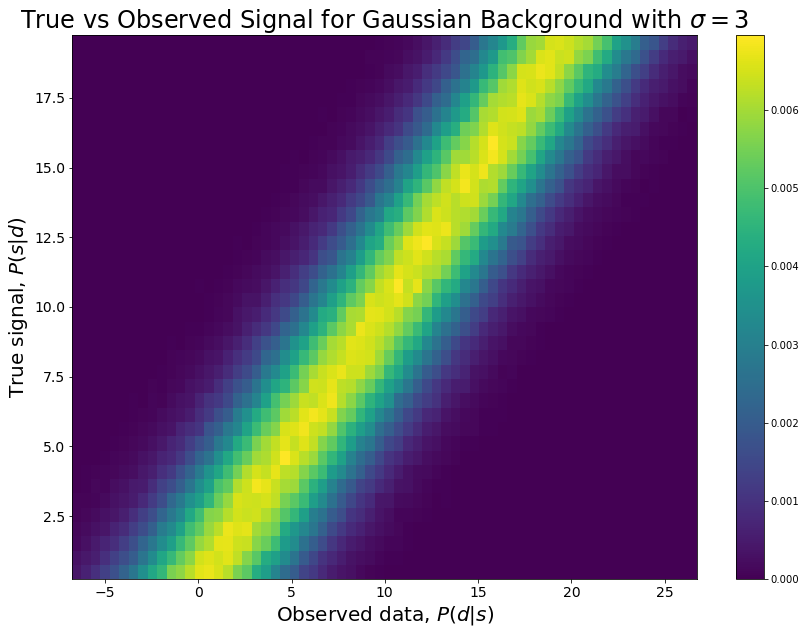

In [4]:
fig, ax = plt.subplots(1,1, figsize=(14,10))
ax.set_title("True vs Observed Signal for Gaussian Background with $\sigma=3$",fontsize=24)
ax.set_xlabel('Observed data, $P(d|s)$',fontsize=20)
ax.set_ylabel('True signal, $P(s|d)$',fontsize=20)
plt.tick_params(labelsize = 14)
plt.pcolormesh(datacenters,signalcenters,Psd.T)

plt.colorbar()
plt.show()

This 2D histogram shows the distribution of a zero-mean Gaussian background with $\sigma=3$ that has had an evenly distributed, random signal added directly to the background. This plot can tell us the possible observational values for a given true signal and vice versa. This means we don't definitely know both when we know one. If we know what the observational value is (i.e. what we saw in an experiment) then we can determine the probability distribution for the possible values the true signal could have been. This is a range of values because the background is not just a constant integer number. Sometimes the background may add or subtract, more or less, therefore there is a range of possible values.

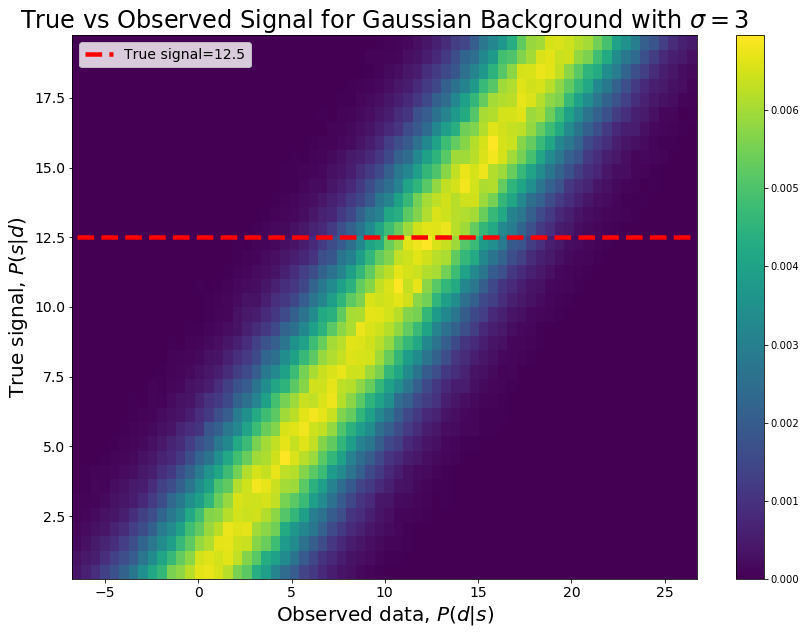

In [5]:
# looking at a true injected signal
# pick a horizontal stripe for an injected true signal of 12.5
tsig = [12.5]*(len(dataedges)-2)

# dashed line for true signal=12.5 overplotted
fig, ax = plt.subplots(1,1, figsize=(14,10))
ax.set_title("True vs Observed Signal for Gaussian Background with $\sigma=3$",fontsize=24)
ax.set_xlabel('Observed data, $P(d|s)$',fontsize=20)
ax.set_ylabel('True signal, $P(s|d)$',fontsize=20)
plt.tick_params(labelsize = 14)
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.plot(dataedges[1:-1],tsig,linestyle='--',linewidth=4.5,color='r',label='True signal=12.5')

ax.legend(loc='upper left', fontsize=14)
plt.colorbar()
plt.show()

In [6]:
obsvals = []
for i in range(len(data)):
    if signal[i] >= 12.5 and signal[i] <=12.59:
        obsvals.append(data[i])

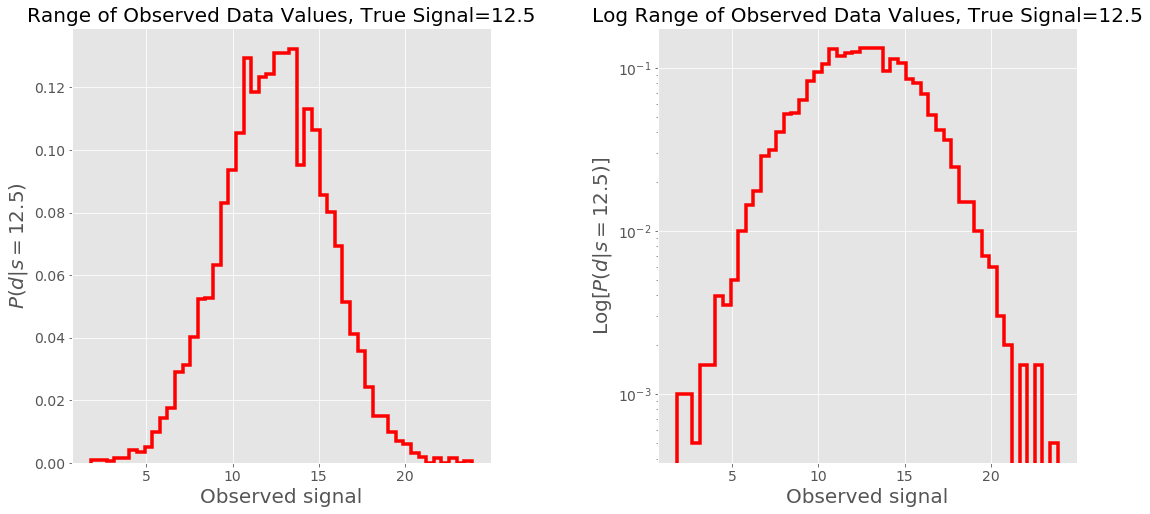

In [19]:
# plot the range of possible observed data values for this true signal
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,8),gridspec_kw={'wspace': 0.4})
plt.style.use('ggplot')

ax1.set_title("Range of Observed Data Values, True Signal=12.5",fontsize=20)
ax2.set_title("Log Range of Observed Data Values, True Signal=12.5",fontsize=20)
ax1.set_xlabel('Observed signal',fontsize=20), ax2.set_xlabel('Observed signal',fontsize=20)
ax1.set_ylabel('$P(d|s=12.5)$',fontsize=20), ax2.set_ylabel('Log[$P(d|s=12.5)$]',fontsize=20)
ax1.tick_params(labelsize = 14), ax2.tick_params(labelsize = 14)

ax1.hist(obsvals,histtype='step',color='r',density=True,linewidth=3.5,bins=50)
ax2.hist(obsvals,histtype='step',color='r',density=True,linewidth=3.5,bins=50)
ax2.set_yscale('log')

plt.show()

Here are two identical plots (except the right plot with log scale) of the observed signal possible range for a set true signal of 12.5. The values that were plotted were taken from the background+signal distribution array (the variable data from before) that lie along the red horizontal line overplotted previously. This means on the left plot, we are looking the probabilites of the different observed signal values along that horizontal line. Again, this is a range due to the nature of a background distribution: it can be additive or subtractive due to the shape of the backgroud, therefore there is some uncertainty on what the observed signal might be. The right plot shows us the same observed signal range, but with a log scale, which shows more definitively the Gaussian shape and the smaller changes along the curve.

The observed signal possible values can be below 0 or greater than 20, despite the injected signal being restricted to these limits. This is because the background can add or subtract to the signal, resulting in values greater or less than any possible true signal value.

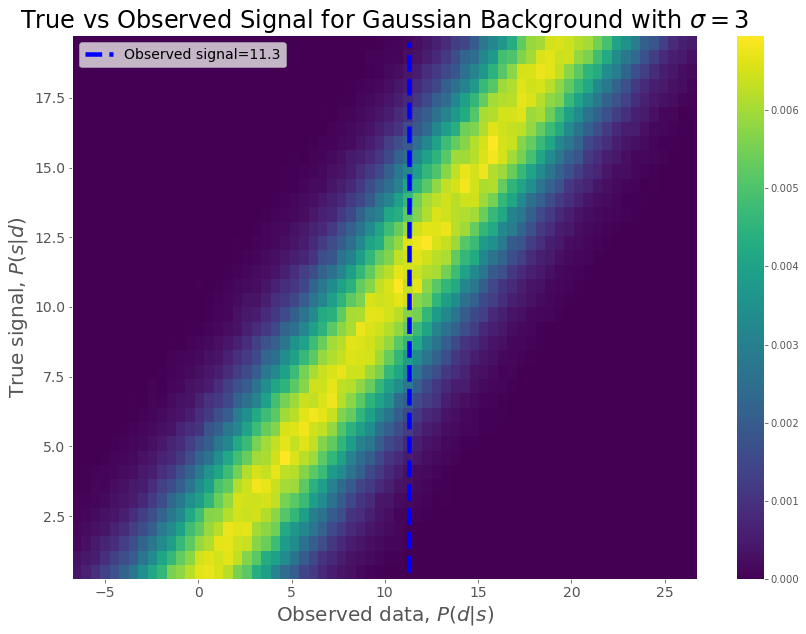

In [8]:
# now select an observed signal, vertical stripe for obs = 11.3

obssig = [11.3]*(len(signaledges)-2)

# dashed line for observed signal=5.5 overplotted
fig, ax = plt.subplots(1,1, figsize=(14,10))
ax.set_title("True vs Observed Signal for Gaussian Background with $\sigma=3$",fontsize=24)
ax.set_xlabel('Observed data, $P(d|s)$',fontsize=20)
ax.set_ylabel('True signal, $P(s|d)$',fontsize=20)
plt.tick_params(labelsize = 14)
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.plot(obssig,signaledges[1:-1],linestyle='--',linewidth=4.5,color='b',label='Observed signal=11.3')

ax.legend(loc='upper left', fontsize=14)
plt.colorbar()
plt.show()

Using the same eact histogram for the signal and signal+background distribution, now we can look at the reverse case, where we know an observed data value and want to find the range of possible true signal values. We draw a verical line now at the observed data value of 11.3.

In [9]:
tsigvals = []
for i in range(len(data)):  # obs = 11.3
    if data[i] >= 11.3 and data[i] <=11.39:
        tsigvals.append(signal[i])

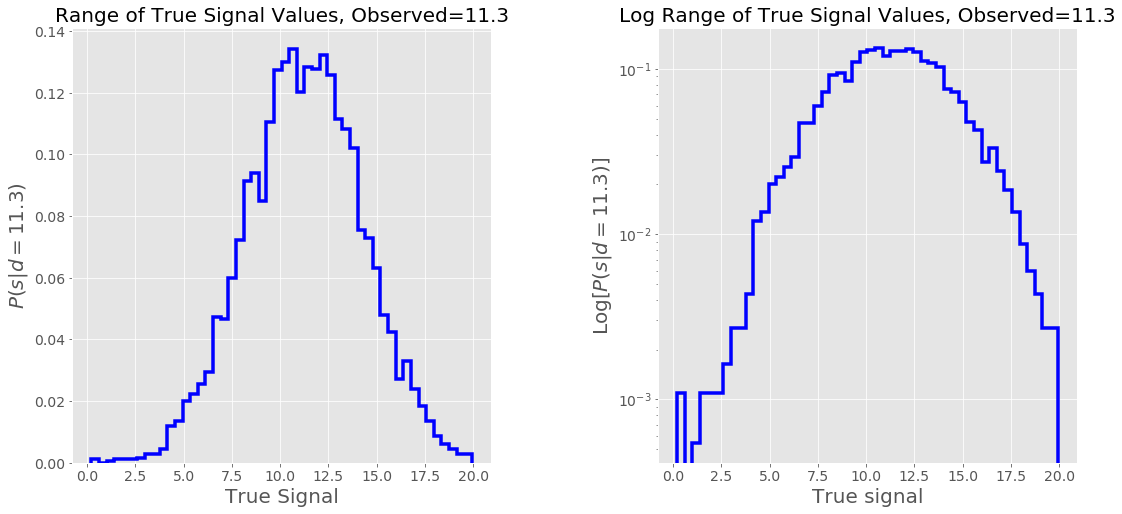

In [10]:
# plot the range of possible true signal values for this observation of 11.3
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,8),gridspec_kw={'wspace': 0.4})
plt.style.use('ggplot')

ax1.set_title("Range of True Signal Values, Observed=11.3",fontsize=20)
ax2.set_title("Log Range of True Signal Values, Observed=11.3",fontsize=20)
ax1.set_xlabel('True Signal',fontsize=20), ax2.set_xlabel('True signal',fontsize=20)
ax1.set_ylabel('$P(s|d=11.3)$',fontsize=20), ax2.set_ylabel('Log[$P(s|d=11.3)$]',fontsize=20)
ax1.tick_params(labelsize = 14), ax2.tick_params(labelsize = 14)

ax1.hist(tsigvals,histtype='step',color='b',density=True,linewidth=3.5,bins=50)
ax2.hist(tsigvals,histtype='step',color='b',density=True,linewidth=3.5,bins=50)
ax2.set_yscale('log')

plt.show()

Following the same steps as previously, we can make probability and log probability plots for the possible true signal values. This time, the plot comes from the data sliced along the blue vertical line we drew. Now we are looking at the shape and probabilities of the different values along the vertical line. The log plot shows us the Gaussian shape of the data and small changes along the curve once again. Note that the true signal can never be less than 0 or greater than 20 based on how we randomly and evenly generated the injected signal values. With that range of (0,20), we know that the true signal value is never going to be outside this bound; this explains why both graphs cut off right at this point.

# Part 2: Gaussian Signal Injection with Nonzero Mean

In [11]:
# make the background, a Gaussian that has been shifted along the x axis
nzbkg = stats.norm.rvs(loc=7,scale=3.5,size=1000000)  # sigma=4
nzsignal = np.random.uniform(low=0,high=20,size=1000000)
nzdata = nzbkg + nzsignal

In [12]:
nzsignaledges = np.linspace(0,20,40)
nzdataedges = np.linspace(0,34,68)

Psd, temp, temp2= np.histogram2d(nzdata,nzsignal, bins=[nzdataedges,nzsignaledges], density=True)
nzdatacenters = (nzdataedges[:-1] + nzdataedges[1:]) / 2
nzsignalcenters = (nzsignaledges[:-1] +nzsignaledges[1:]) / 2

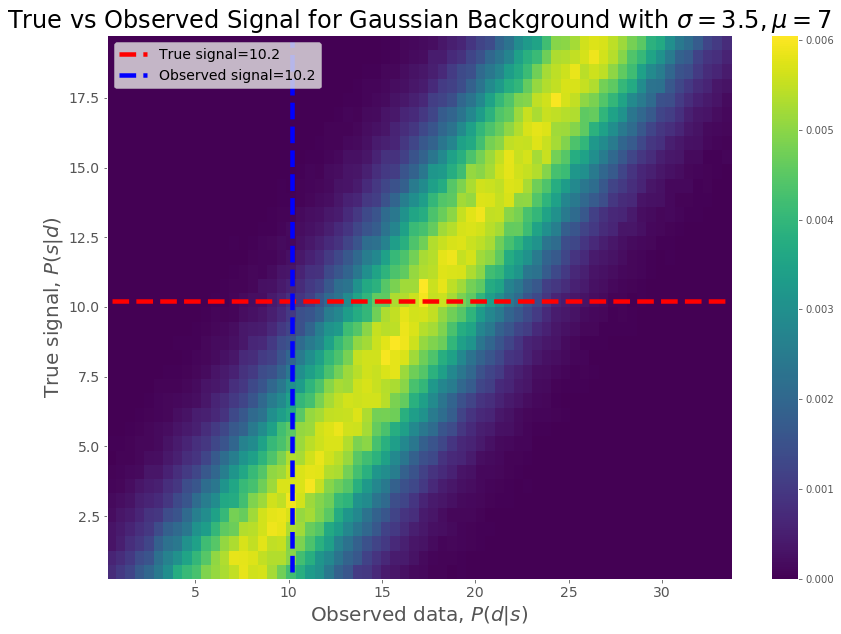

In [13]:
# repeat the same plots. this time use same value for true and observed for comparison
d = [10.2]*(len(nzdataedges)-2) 
t = [10.2]*(len(nzsignaledges)-2)

# dashed line for true signal=12.5 overplotted
fig, ax = plt.subplots(1,1, figsize=(14,10))
ax.set_title("True vs Observed Signal for Gaussian Background with $\sigma=3.5, \mu=7$",fontsize=24)
ax.set_xlabel('Observed data, $P(d|s)$',fontsize=20)
ax.set_ylabel('True signal, $P(s|d)$',fontsize=20)
plt.tick_params(labelsize = 14)
plt.pcolormesh(nzdatacenters,nzsignalcenters,Psd.T)
plt.plot(nzdataedges[1:-1],d,linestyle='--',linewidth=4.5,color='r',label='True signal=10.2')
plt.plot(t,nzsignaledges[1:-1],linestyle='--',linewidth=4.5,color='b',label='Observed signal=10.2')

ax.legend(loc='upper left', fontsize=14)
plt.colorbar()
plt.show()

This is another 2D histogram of a signal+Gaussian background, but this time the mean of the Gaussian has been changed, which shifts along the x-axis. I arbitrarily chose a mean of 7 and also changed the sigma value to be 3.5 here. The background still is a Gaussian pdf and the injected signal remained the same with a range of (0,20). Both the true and observed signal=10.2 lines are plotted on this histogram. These are the lines we will slice data from to look at the range plots again.

In [14]:
# now find the observed data value range given a true signal of 10.2
nzobsvals = []
for i in range(len(nzdata)):  # obs = 11.3
    if nzsignal[i] >= 10.2 and nzsignal[i] <=10.29:
        nzobsvals.append(nzdata[i])

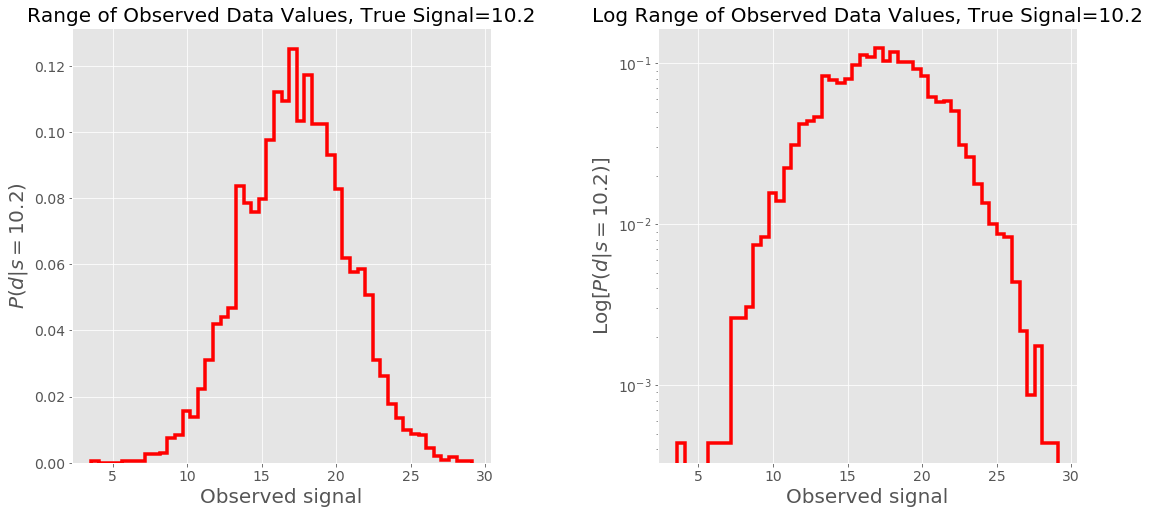

In [15]:
# plot the range of possible observed data values for this true signal 10.2
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,8),gridspec_kw={'wspace': 0.4})
plt.style.use('ggplot')

ax1.set_title("Range of Observed Data Values, True Signal=10.2",fontsize=20)
ax2.set_title("Log Range of Observed Data Values, True Signal=10.2",fontsize=20)
ax1.set_xlabel('Observed signal',fontsize=20), ax2.set_xlabel('Observed signal',fontsize=20)
ax1.set_ylabel('$P(d|s=10.2)$',fontsize=20), ax2.set_ylabel('Log[$P(d|s=10.2)$]',fontsize=20)
ax1.tick_params(labelsize = 14), ax2.tick_params(labelsize = 14)

ax1.hist(nzobsvals,histtype='step',color='r',density=True,linewidth=3.5,bins=50)
ax2.hist(nzobsvals,histtype='step',color='r',density=True,linewidth=3.5,bins=50)
ax2.set_yscale('log')

plt.show()

Similar to before, we plot the range of observed values for a true signal of 10.2, as well as the corresponding log plot. The log plot shows a pretty Gaussian distribution with some small changes along that pdf curve. The observed signal mean for a true signal=10.2 is not going to be 10.2. This is because we know for sure we are looking at the background plus signal combined, and with a background mean of 7, we know this 7 is going to be added to each possible value. This is why the mean here rests at about 17.2 instead of 10.2. If it were 0-mean, the most probable observed signal value would be the same/around that of the true signal. The observed values essentially are shifted due to the Gaussian background shift, but the true signal values were not.

In [16]:
nztsigvals = []
for i in range(len(nzdata)):  # obs = 10.2
    if nzdata[i] >= 10.2 and nzdata[i] <=10.29:
        nztsigvals.append(nzsignal[i])

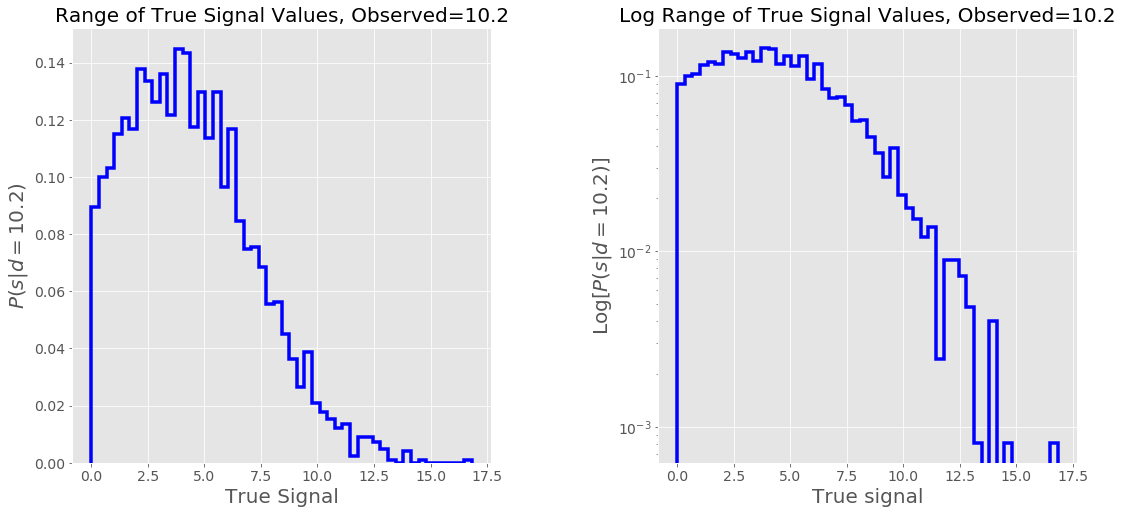

In [17]:
# plot the range of possible true signal values for this observation of 10.2
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,8),gridspec_kw={'wspace': 0.4})
plt.style.use('ggplot')

ax1.set_title("Range of True Signal Values, Observed=10.2",fontsize=20)
ax2.set_title("Log Range of True Signal Values, Observed=10.2",fontsize=20)
ax1.set_xlabel('True Signal',fontsize=20), ax2.set_xlabel('True signal',fontsize=20)
ax1.set_ylabel('$P(s|d=10.2)$',fontsize=20), ax2.set_ylabel('Log[$P(s|d=10.2)$]',fontsize=20)
ax1.tick_params(labelsize = 14), ax2.tick_params(labelsize = 14)

ax1.hist(nztsigvals,histtype='step',color='b',density=True,linewidth=3.5,bins=50)
ax2.hist(nztsigvals,histtype='step',color='b',density=True,linewidth=3.5,bins=50)
ax2.set_yscale('log')

plt.show()

Similar to before, we plot the true signal range if the observed signal is 10.2. This time, we see the abrupt cutoff at signal=0. This is because we did not inject any signal below 0, or any above 20, so these are not possible values for the true signal.

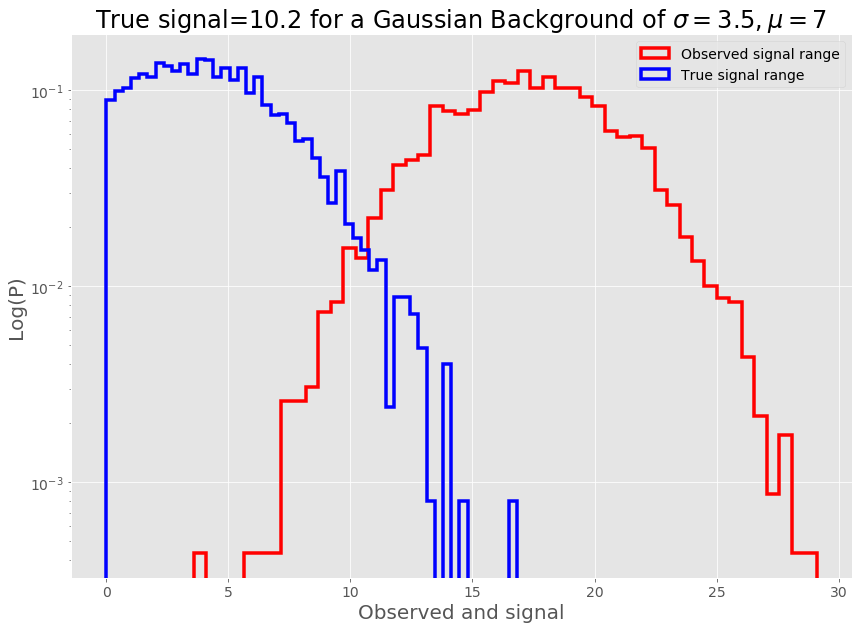

In [18]:
fig, ax = plt.subplots(1,1, figsize=(14,10))
ax.set_title("True signal=10.2 for a Gaussian Background of $\sigma=3.5, \mu=7$",fontsize=24)
ax.set_xlabel('Observed and signal',fontsize=20)
ax.set_ylabel('Log(P)',fontsize=20)
plt.tick_params(labelsize = 14)

ax.hist(nzobsvals,histtype='step',color='r',density=True,linewidth=3.5,bins=50,label='Observed signal range')
ax.hist(nztsigvals,histtype='step',color='b',density=True,linewidth=3.5,bins=50,label='True signal range')
ax.set_yscale('log')

ax.legend(loc='best',fontsize=14)
plt.show()

Finally, comparing the true signal range and the observed signal range, we see these two do *not* have the same center or mean on the log plot. The red curve, the possible observed values if the signal is truly 10.2, shows the nice Gaussian we saw earlier, but shifted farther down the x-axis. This is due to the data having both the background plus signal. We know the background has a mean of 7, and this mean is added to the true signal (as I discussed earlier). The signal however did not have an additive change or shift along x. Therefore, these two probability distributions will not be centered at the same value if the background has an additive or subtractive mean to it, because the raw signal alone does not experience this change.